In [1]:
# Customer churn prediction using ANN - (how many of customers are leaving the business) to check how customers are leaving

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as py
%matplotlib inline
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv(r'Downloads\Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.drop('customerID', axis=1, inplace= True)

In [10]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [11]:
df['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [12]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df[df['TotalCharges'] == ' '].shape

(11, 20)

In [14]:
df1 = df[df['TotalCharges'] != ' ']

In [15]:
df1.shape

(7032, 20)

In [16]:
df1['TotalCharges'] = df1['TotalCharges'].astype(float)

C:\Users\HP\AppData\Local\Temp/ipykernel_11604/3436144166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = df1['TotalCharges'].astype(float)


In [17]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

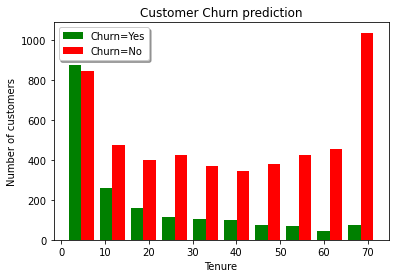

In [18]:
# based on Tenure checking how much long term customer is loyal

tenure_churn_no = df1[df1['Churn'] == 'No']['tenure']    #not leaving
tenure_churn_yes = df1[df1['Churn'] == 'Yes']['tenure']    # leaving

py.xlabel('Tenure')
py.ylabel('Number of customers')
py.title('Customer Churn prediction')

py.hist([tenure_churn_yes ,tenure_churn_no], color = ['green', 'red'], label = ['Churn=Yes', 'Churn=No'])
py.legend(shadow = True)

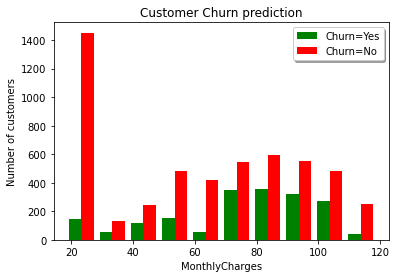

In [19]:
MonthlyCharges_no = df1[df1['Churn'] == 'No']['MonthlyCharges']
MonthlyCharges_yes = df1[df1['Churn'] == 'Yes']['MonthlyCharges']

py.xlabel('MonthlyCharges')
py.ylabel('Number of customers')
py.title('Customer Churn prediction')

py.hist([MonthlyCharges_yes ,MonthlyCharges_no], color = ['green', 'red'], label = ['Churn=Yes', 'Churn=No'])
py.legend(shadow= True)

In [20]:
def find_unique(df1):
    for column in df1:
        if df1[column].dtypes == 'object':
            print(f'{column} : {df1[column].unique()}')

In [21]:
find_unique(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
# cleaning the data like if we have "No internet service" have to replace with "NO" only which means "NO"

df1.replace("No internet service", "No", inplace= True)
df1.replace("No phone service", "No", inplace= True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [23]:
find_unique(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [24]:
# columns with yes and no values

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [25]:
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [26]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [27]:
df1['gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True)

In [28]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [29]:
InternetService = pd.get_dummies(df1['InternetService'], prefix = 'Internet')

In [30]:
df2 = pd.concat([df1, InternetService], axis=1)

In [31]:
df2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Internet_DSL,Internet_Fiber optic,Internet_No
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0


In [32]:
df2 = pd.get_dummies(columns = ['Contract', 'PaymentMethod'], data = df2)

In [33]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Internet_DSL', 'Internet_Fiber optic', 'Internet_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [34]:
df2.drop('InternetService', axis=1, inplace=True)

In [35]:
df2.shape

(7032, 27)

In [36]:
df2['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [38]:
df2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Internet_DSL,Internet_Fiber optic,Internet_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1


In [39]:
x = df2.drop('Churn', axis=1)
y = df2['Churn']

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 101 )

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (26,)),
    keras.layers.Dense(30, activation = 'relu'), 
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
        optimizer = 'adam', 
        metrics = ['accuracy'],
        loss= 'binary_crossentropy'
)

In [42]:
model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
176/176 [==============================] - 1s 2ms/step - loss: 0.4936 - accuracy: 0.7502
Epoch 2/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7877
Epoch 3/20
176/176 [==============================] - 0s 3ms/step - loss: 0.4258 - accuracy: 0.7938
Epoch 4/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.7977
Epoch 5/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.7975
Epoch 6/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8007
Epoch 7/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.7995
Epoch 8/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8011
Epoch 9/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8036
Epoch 10/20
176/176 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8028

In [43]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8124


[0.41886106133461, 0.8123667240142822]

In [44]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[0.74968404],
       [0.21588048],
       [0.32609594],
       [0.77724856],
       [0.05630976]], dtype=float32)

In [45]:
y_test[:5]

4253    0
2914    0
1569    0
5227    0
4427    0
Name: Churn, dtype: int64

In [46]:
y_pred_val = []

for val in y_pred:
    if val>0.5:
        y_pred_val.append(1)
    else:
        y_pred_val.append(0)

In [47]:
y_pred_val[:10]

[1, 0, 0, 1, 0, 0, 1, 0, 1, 1]

In [48]:
y_test[:10]

4253    0
2914    0
1569    0
5227    0
4427    0
5879    0
155     0
109     0
5023    1
5257    1
Name: Churn, dtype: int64

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_val))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1052
           1       0.64      0.58      0.61       355

    accuracy                           0.81      1407
   macro avg       0.75      0.74      0.74      1407
weighted avg       0.81      0.81      0.81      1407

